In [1]:
import numpy as np
import geopy
from argo_nn.slope_calc import *
from argo_nn.Rossby import RossbyBase
from argo_nn.Grabber import *

world_depth = EtopoGrabber()
rossby = RossbyBase()

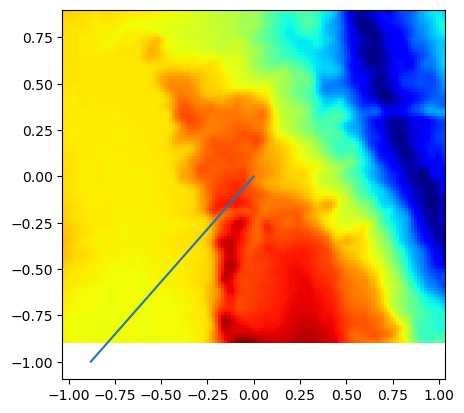

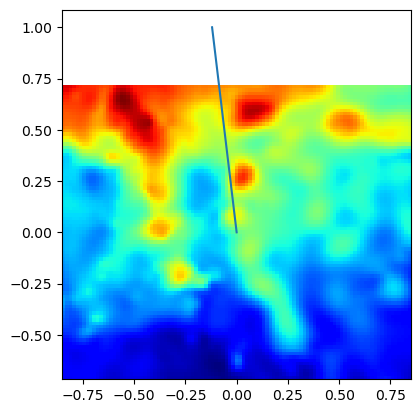

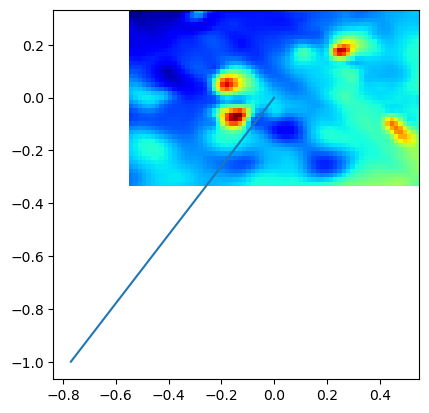

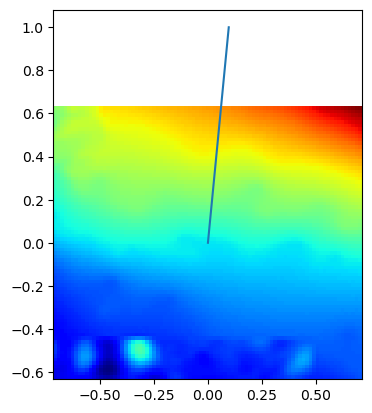

(0.0966847711058107, 1.0)

In [2]:
point = geopy.Point(29,142)
subsample_depth = rossby.rossby_def_extent(point, world_depth) #radius of this should scale with rossby deformation radius
get_opt_params(subsample_depth, rossby, '1.png')

point = geopy.Point(31,159)
subsample_depth = rossby.rossby_def_extent(point, world_depth) #radius of this should scale with rossby deformation radius
get_opt_params(subsample_depth, rossby, '2.png')

point = geopy.Point(52,-163)
subsample_depth = rossby.rossby_def_extent(point, world_depth) #radius of this should scale with rossby deformation radius
get_opt_params(subsample_depth, rossby, '3.png')

point = geopy.Point(25.431519, -89.523394)
subsample_depth = rossby.rossby_def_extent(point, world_depth) #radius of this should scale with rossby deformation radius
get_opt_params(subsample_depth, rossby, '4.png')

In [3]:
import pandas as pd

data = pd.read_csv('SouthPacific.csv').drop(columns=['Unnamed: 0', 'in_chosen_basin'])
data

,folderidx,float,profileidx,year,month,day,lat,lon,nlat,nlon,...,prev_ts1,prev_ts2,prev_ts3,prev_ts4,prev_ts5,prev_ts6,prev_ts7,prev_ts8,prev_dy,prev_dx
0,2.0,2902573.0,1.0,2013.0,10.0,10.0,-27.777,-109.312,-27.722,-109.147,...,0.313274,-6.381664,-0.307569,1.169331,0.678437,0.630896,-0.723380,0.416301,-0.046,0.265
1,2.0,2902573.0,2.0,2013.0,10.0,20.0,-27.722,-109.147,-27.461,-108.919,...,-0.839091,-6.740602,-0.870774,1.611743,0.820251,0.886818,-0.810814,0.542596,0.055,0.165
2,2.0,2902573.0,3.0,2013.0,10.0,30.0,-27.461,-108.919,-27.396,-108.747,...,-0.413727,-6.598265,-0.616752,1.379309,0.782344,0.769953,-0.841099,0.628301,0.261,0.228
3,2.0,2902573.0,4.0,2013.0,11.0,9.0,-27.396,-108.747,-27.184,-108.779,...,0.870870,-6.036335,-0.214488,0.994610,0.597145,0.429359,-0.646446,0.456008,0.065,0.172
4,2.0,2902573.0,5.0,2013.0,11.0,19.0,-27.184,-108.779,-27.197,-108.802,...,0.978774,-5.911484,-0.293214,1.177932,0.583710,0.624795,-0.630760,0.529487,0.212,-0.032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59191,10.0,5900395.0,10.0,2004.0,1.0,6.0,-31.987,-130.156,-31.823,-130.239,...,0.747345,-4.911387,-0.073771,-1.082395,-0.362481,0.624399,-0.222743,0.426153,0.094,0.193
59192,10.0,5900395.0,11.0,2004.0,1.0,16.0,-31.823,-130.239,-31.943,-130.363,...,1.120633,-4.792071,-0.175300,-0.780688,-0.340543,0.737954,-0.338791,0.602678,0.164,-0.083
59193,10.0,5900395.0,12.0,2004.0,1.0,26.0,-31.943,-130.363,-32.069,-130.205,...,1.455820,-4.562668,0.259674,-1.321892,-0.436276,0.516380,-0.260359,0.592548,-0.120,-0.124
59194,10.0,5900395.0,13.0,2004.0,2.0,5.0,-32.069,-130.205,-31.994,-129.943,...,1.428588,-4.544283,0.092383,-1.170868,-0.446612,0.569944,-0.247247,0.543559,-0.126,0.158


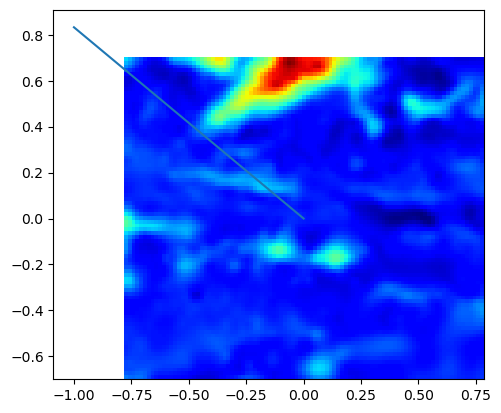

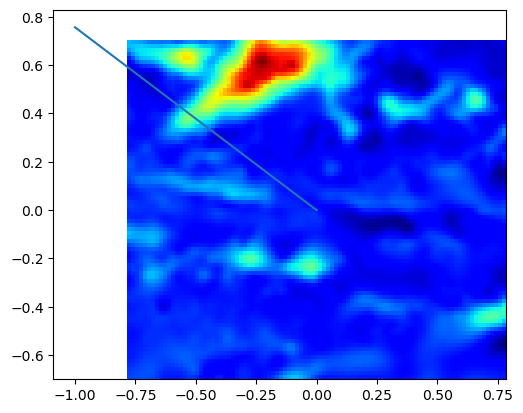

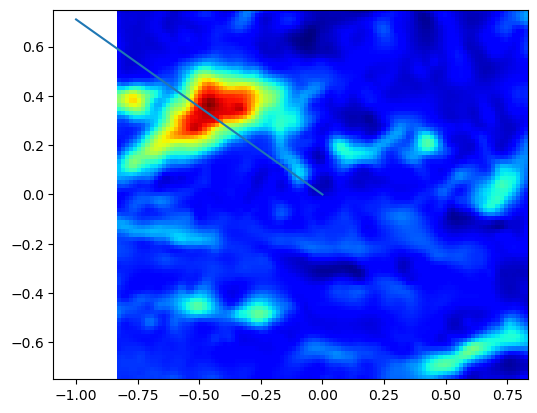

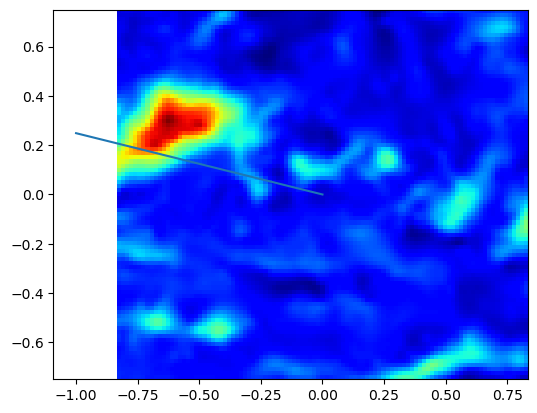

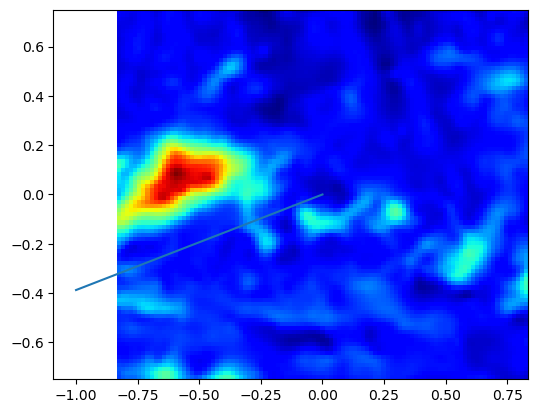

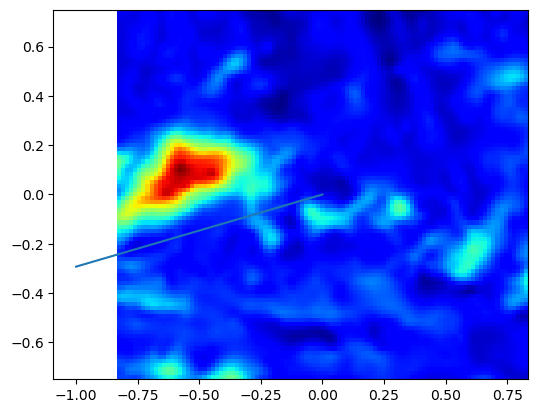

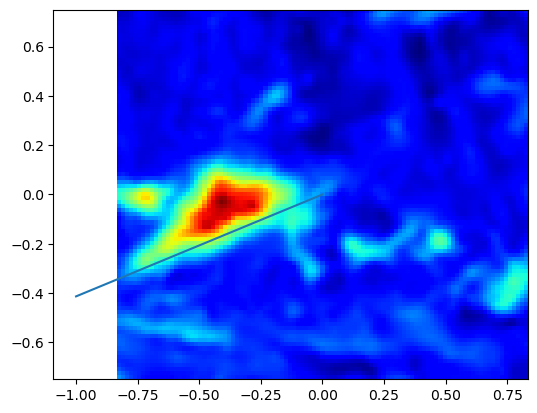

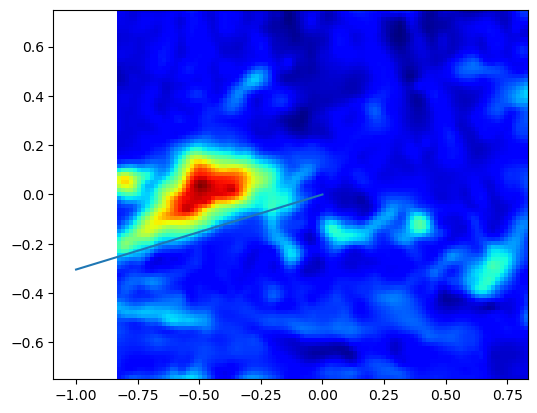

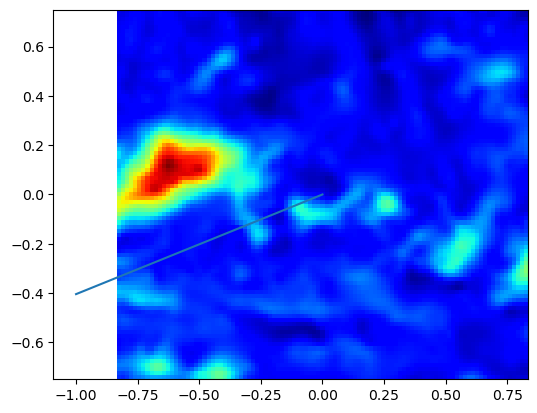

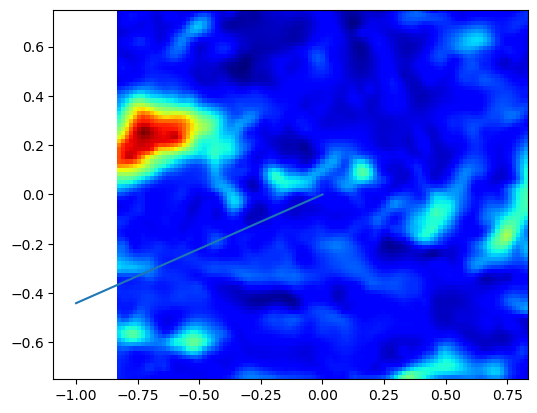

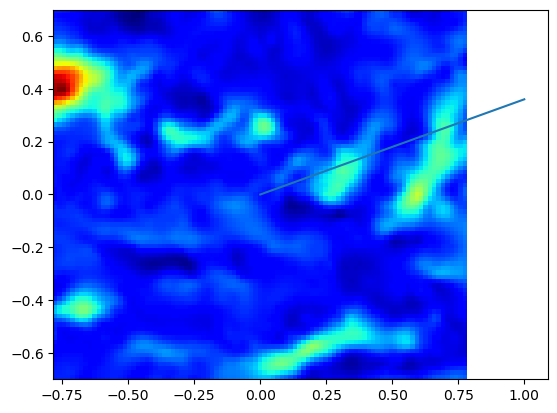

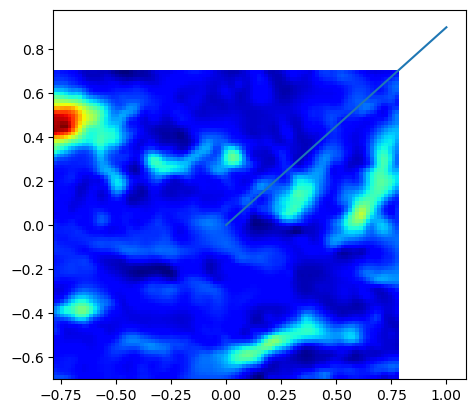

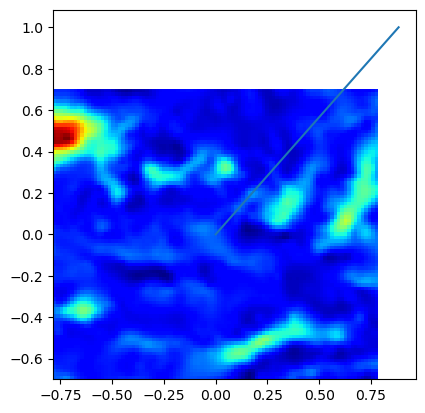

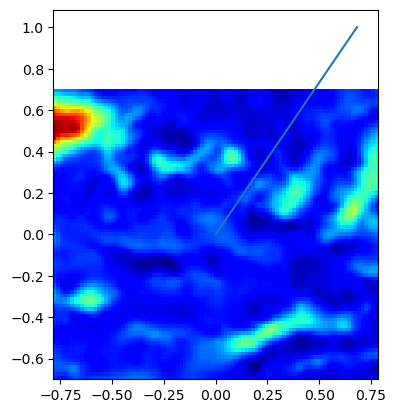

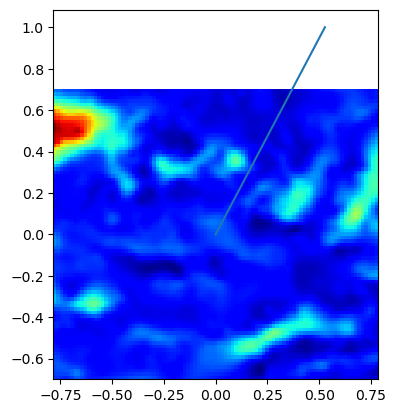

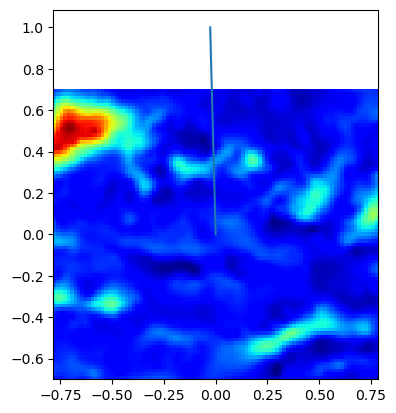

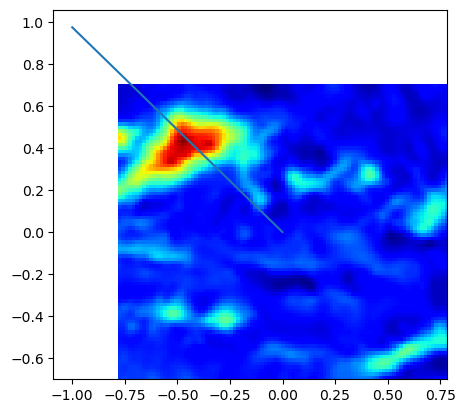

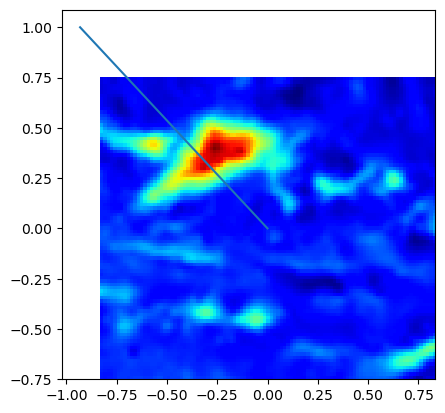

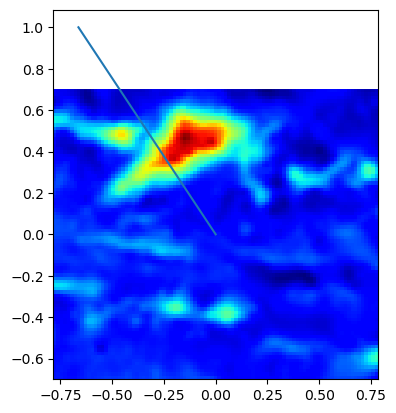

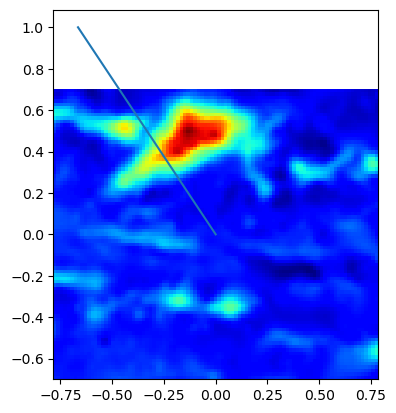

In [4]:
x_vals = data.get('lon')
y_vals = data.get('lat')

for i in range(20):
    point = geopy.Point(y_vals[i], x_vals[i])
    subsample_depth = rossby.rossby_def_extent(point, world_depth) #radius of this should scale with rossby deformation radius
    get_opt_params(subsample_depth, rossby, '3.png')

In [5]:
bath1 = 2*np.ones(len(y_vals))
bath2 = 2*np.ones(len(y_vals))

for i in range(len(y_vals)):
    point = geopy.Point(y_vals[i], x_vals[i])
    try:
        subsample_depth = rossby.rossby_def_extent(point, world_depth) #radius of this should scale with rossby deformation radius
        a, b = get_opt_params(subsample_depth, rossby, '3.png', plot=False)
    except:
        a = 2
        b = 2
    bath1[i] = a
    bath2[i] = b

In [ ]:
added = data.assign(bath1=bath1).assign(bath2=bath2)
added = added[(added.get('bath1') != 2)]
added.to_csv('EOF_Bath_SPacific.csv')
added

In [ ]:
def date_to_idx(year, month, day):
    ans = year * 10_000 + month * 100 + day - 10_000 * 2017 - 100 * 3 - 1
    if ans >= 0:
        return ans
    return None

aviso_depths = [None] * (date_to_idx(2023, 6, 31))

for year in range(2017, 2024):
    for month in range(1, 13):
        for day in range(1, 31):
            if year == 2017 and month <= 2:
                continue #jan, feb 2017 not in data set
            elif year == 2021 and month == 12:
                continue #dec 2021 not in data set
            elif year == 2022 and month == 1:
                continue #jan 2022 not in data set
            elif year == 2023 and month >= 7:
                continue #too recent

            try:
                aviso_depths[date_to_idx(year, month, day)] = AvisoGrabber(year, month, day)
            except:
                pass

In [ ]:
ssh1 = 2*np.ones(len(y_vals))
ssh2 = 2*np.ones(len(y_vals))
years = data.get('year')
months = data.get('month')
days = data.get('day')

for i in range(len(x_vals)):
    point = geopy.Point(y_vals[i], x_vals[i])
    try:
        aviso_depth = aviso_depths[date_to_idx(int(years[i]), int(months[i]), int(days[i]))]
        subsample_depth = rossby.rossby_def_extent(point, aviso_depth)
        a, b = get_opt_params(subsample_depth, rossby, '3.png', plot=False)
    except Exception as e:
        a = 2
        b = 2
    ssh1[i] = a
    ssh2[i] = b

added = data.assign(ssh1=ssh1).assign(ssh2=ssh2).assign(bath1=bath1).assign(bath2=bath2)
added = added[(added.get('bath1') != 2) & (added.get('ssh1') != 2)]
added.to_csv('SPacific.csv')
added

,folderidx,float,profileidx,year,month,day,lat,lon,nlat,nlon,...,prev_ts5,prev_ts6,prev_ts7,prev_ts8,prev_dy,prev_dx,ssh1,ssh2,bath1,bath2
122,2.0,2902573.0,125.0,2017.0,3.0,3.0,-27.995,-120.065,-28.145,-120.164,...,0.342933,0.443193,-0.442858,0.514106,-0.128,-0.221,1.000000,-1.587225,1.000000,0.031732
123,2.0,2902573.0,126.0,2017.0,3.0,13.0,-28.145,-120.164,-28.267,-120.216,...,0.259838,0.461459,-0.452919,0.496550,-0.150,-0.099,1.000000,-0.779453,1.000000,0.200338
125,2.0,2902573.0,128.0,2017.0,4.0,3.0,-28.250,-120.344,-28.163,-120.430,...,0.534783,0.603244,-0.601384,0.508919,0.017,-0.128,1.000000,0.031837,1.000000,0.073253
126,2.0,2902573.0,129.0,2017.0,4.0,13.0,-28.163,-120.430,-27.990,-120.652,...,0.640600,1.051018,-0.737335,0.710894,0.087,-0.086,1.000000,5.277296,1.000000,0.232778
127,2.0,2902573.0,130.0,2017.0,4.0,22.0,-27.990,-120.652,-27.808,-120.970,...,0.540655,0.741024,-0.644372,0.550055,0.173,-0.222,1.000000,18.858501,-0.068842,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59038,10.0,3902389.0,134.0,2022.0,8.0,30.0,-20.123,-109.789,-20.091,-109.661,...,1.127813,0.338755,-0.503737,-0.133409,-0.007,0.128,-0.551358,1.000000,-7.737074,1.000000
59039,10.0,3902389.0,135.0,2022.0,9.0,9.0,-20.091,-109.661,-20.018,-109.584,...,1.231033,0.700594,-0.679503,-0.065859,0.032,0.128,-0.028281,1.000000,-4.334649,1.000000
59040,10.0,3902389.0,136.0,2022.0,9.0,19.0,-20.018,-109.584,-19.891,-109.564,...,1.312617,0.767989,-0.819506,0.113578,0.073,0.077,-0.086688,1.000000,-3.750459,1.000000
59041,10.0,3902389.0,154.0,2023.0,3.0,17.0,-20.220,-108.673,-20.056,-108.263,...,1.092594,-0.028627,-0.405811,-0.383263,-0.252,0.315,1.000000,-0.146425,-7.538328,1.000000
